In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [6]:
# Load the dataset
data = pd.read_csv("C:\\Users\\ookom\\Downloads\\yield_df.csv")

In [7]:
# Display first few rows
print(data.head())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [8]:
print(data.isnull().sum())

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


In [18]:
# Filter for Maize
maize_data = data[data['Item'] == 'Maize']

In [11]:
# Display first few rows
# Display the first few rows of the filtered dataset
print(maize_data.head())

    Unnamed: 0     Area   Item  Year  hg/ha_yield  \
0            0  Albania  Maize  1990        36613   
6            6  Albania  Maize  1991        29068   
12          12  Albania  Maize  1992        24876   
18          18  Albania  Maize  1993        24185   
23          23  Albania  Maize  1994        25848   

    average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                          1485.0              121.0     16.37  
6                          1485.0              121.0     15.36  
12                         1485.0              121.0     16.06  
18                         1485.0              121.0     16.05  
23                         1485.0              201.0     16.96  


<Figure size 1200x1000 with 0 Axes>

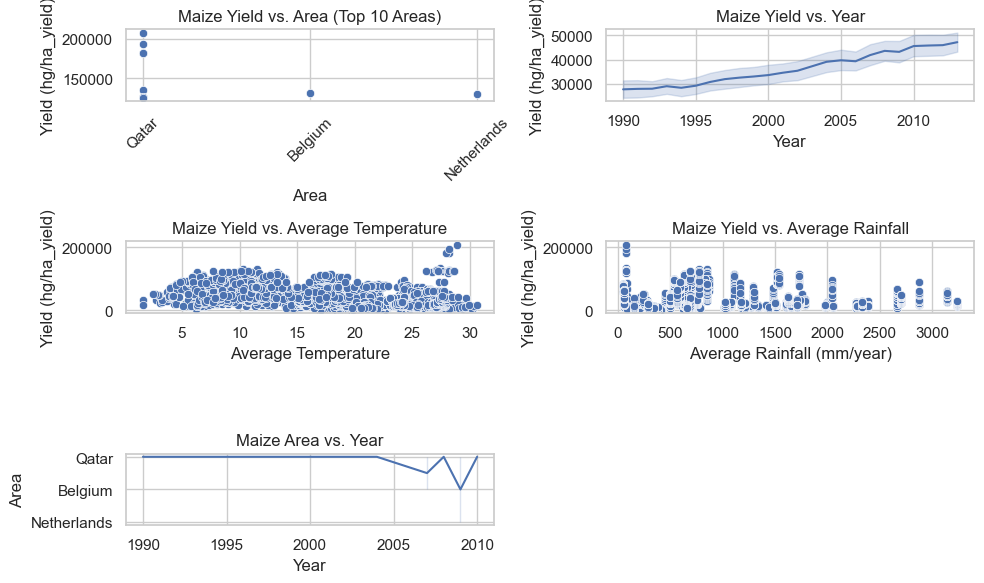

In [20]:

# Set up the style and layout for the plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Plot 1: Maize Yield (hg/ha_yield) vs. Areca
#create top_maize_data based on top 10 maize yields
top_maize_data = maize_data.nlargest(10, 'hg/ha_yield')
# Plot the scatter plot for the top 10 areas
plt.figure(figsize=(10, 6))
plt.subplot(3, 2, 1)
sns.scatterplot(data=top_maize_data, x='Area', y='hg/ha_yield')
plt.title('Maize Yield vs. Area (Top 10 Areas)')
plt.xlabel('Area')
plt.ylabel('Yield (hg/ha_yield)')
plt.xticks(rotation=45)#plt.subplot(3, 2, 1)
#sns.scatterplot(data=maize_data, x='Area', y='hg/ha_yield')
#plt.title('Maize Yield vs. Area')
#plt.xlabel('Area')
#plt.ylabel('Yield (hg/ha_yield)')

# Plot 2: Maize Yield (hg/ha_yield) vs. Year
plt.subplot(3, 2, 2)
sns.lineplot(data=maize_data, x='Year', y='hg/ha_yield')
plt.title('Maize Yield vs. Year')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha_yield)')

# Plot 3: Maize Yield (hg/ha_yield) vs. Average Temperature
plt.subplot(3, 2, 3)
sns.scatterplot(data=maize_data, x='avg_temp', y='hg/ha_yield')
plt.title('Maize Yield vs. Average Temperature')
plt.xlabel('Average Temperature')
plt.ylabel('Yield (hg/ha_yield)')

# Plot 4: Maize Yield (hg/ha_yield) vs. Average Rainfall
plt.subplot(3, 2, 4)
sns.scatterplot(data=maize_data, x='average_rain_fall_mm_per_year', y='hg/ha_yield')
plt.title('Maize Yield vs. Average Rainfall')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Yield (hg/ha_yield)')

# Plot 5: Maize Area vs. Year
plt.subplot(3, 2, 5)
sns.lineplot(data= top_maize_data, x='Year', y='Area')
plt.title('Maize Area vs. Year')
plt.xlabel('Year')
plt.ylabel('Area')

plt.tight_layout()
plt.show()


In [21]:
# Calculate the top 10 areas based on the average yield
top_areas = maize_data.groupby('Area')['hg/ha_yield'].mean().nlargest(10).index

# Filter the maize_data to only include the top 10 areas
top_maize_data = maize_data[maize_data['Area'].isin(top_areas)]

In [22]:
# Filter for Maize
maize_data = data[data['Item'] == 'Maize']

In [23]:
print(maize_data.head())

    Unnamed: 0     Area   Item  Year  hg/ha_yield  \
0            0  Albania  Maize  1990        36613   
6            6  Albania  Maize  1991        29068   
12          12  Albania  Maize  1992        24876   
18          18  Albania  Maize  1993        24185   
23          23  Albania  Maize  1994        25848   

    average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                          1485.0              121.0     16.37  
6                          1485.0              121.0     15.36  
12                         1485.0              121.0     16.06  
18                         1485.0              121.0     16.05  
23                         1485.0              201.0     16.96  


In [24]:
# One-Hot Encode the 'Area' column
maize_data = pd.get_dummies(maize_data, columns=['Area'], drop_first=True)


In [25]:
# Convert other features to numeric
maize_data['avg_temp'] = pd.to_numeric(maize_data['avg_temp'], errors='coerce')
maize_data['average_rain_fall_mm_per_year'] = pd.to_numeric(maize_data['average_rain_fall_mm_per_year'], errors='coerce')


In [26]:
# Check the new columns after one-hot encoding
print(maize_data.head())

    Unnamed: 0   Item  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0            0  Maize  1990        36613                         1485.0   
6            6  Maize  1991        29068                         1485.0   
12          12  Maize  1992        24876                         1485.0   
18          18  Maize  1993        24185                         1485.0   
23          23  Maize  1994        25848                         1485.0   

    pesticides_tonnes  avg_temp  Area_Algeria  Area_Angola  Area_Argentina  \
0               121.0     16.37         False        False           False   
6               121.0     15.36         False        False           False   
12              121.0     16.06         False        False           False   
18              121.0     16.05         False        False           False   
23              201.0     16.96         False        False           False   

    ...  Area_Suriname  Area_Switzerland  Area_Tajikistan  Area_Thailand  \
0   

In [27]:
# Drop the 'Item' column
maize_data = maize_data.drop(columns=['Item'])

# Verify if the 'Item' column is dropped
print(maize_data.head())


    Unnamed: 0  Year  hg/ha_yield  average_rain_fall_mm_per_year  \
0            0  1990        36613                         1485.0   
6            6  1991        29068                         1485.0   
12          12  1992        24876                         1485.0   
18          18  1993        24185                         1485.0   
23          23  1994        25848                         1485.0   

    pesticides_tonnes  avg_temp  Area_Algeria  Area_Angola  Area_Argentina  \
0               121.0     16.37         False        False           False   
6               121.0     15.36         False        False           False   
12              121.0     16.06         False        False           False   
18              121.0     16.05         False        False           False   
23              201.0     16.96         False        False           False   

    Area_Armenia  ...  Area_Suriname  Area_Switzerland  Area_Tajikistan  \
0          False  ...          False           

In [28]:
# Adjust feature selection based on actual column names
X = maize_data.drop(columns=['hg/ha_yield'])  # Drop the target column
y = maize_data['hg/ha_yield']  # Target variable (yield)

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Initialize and train the model (Random Forest Regressor in this case)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 2190.771115151515
Mean Squared Error: 25757232.803665332
R-squared: 0.9649222944919391


In [31]:
# Feature selection for maize yield prediction
# Check column names after One-Hot Encoding
print(maize_data.columns)

# Adjust feature selection based on actual column names
X = maize_data.drop(columns=['hg/ha_yield'])  # Drop the target column
y = maize_data['hg/ha_yield']  # Target variable (yield)

# Now X will contain all the features, including the one-hot encoded 'Area' columns


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (Random Forest Regressor in this case)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Index(['Unnamed: 0', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'Area_Algeria', 'Area_Angola',
       'Area_Argentina', 'Area_Armenia', 'Area_Australia', 'Area_Austria',
       'Area_Azerbaijan', 'Area_Bahamas', 'Area_Bangladesh', 'Area_Belarus',
       'Area_Belgium', 'Area_Botswana', 'Area_Brazil', 'Area_Bulgaria',
       'Area_Burkina Faso', 'Area_Burundi', 'Area_Cameroon', 'Area_Canada',
       'Area_Central African Republic', 'Area_Chile', 'Area_Colombia',
       'Area_Croatia', 'Area_Denmark', 'Area_Dominican Republic',
       'Area_Ecuador', 'Area_Egypt', 'Area_El Salvador', 'Area_Eritrea',
       'Area_France', 'Area_Germany', 'Area_Ghana', 'Area_Greece',
       'Area_Guatemala', 'Area_Guinea', 'Area_Guyana', 'Area_Haiti',
       'Area_Honduras', 'Area_Hungary', 'Area_India', 'Area_Indonesia',
       'Area_Iraq', 'Area_Italy', 'Area_Jamaica', 'Area_Japan',
       'Area_Kazakhstan', 'Area_Kenya', 'Area_Lebanon', 'Area_Lesotho'

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Adjust feature selection based on actual column names
X = maize_data.drop(columns=['hg/ha_yield'])  # Drop the target column
y = maize_data['hg/ha_yield']  # Target variable (yield)


# Split data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Output the evaluation results
print("Gradient Boosting - Mean Absolute Error:", mae_gb)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R-squared:", r2_gb)


Gradient Boosting - Mean Absolute Error: 6269.524509532274
Gradient Boosting - Mean Squared Error: 74273610.93465237
Gradient Boosting - R-squared: 0.89884985428189


In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Adjust feature selection based on actual column names
X = maize_data.drop(columns=['hg/ha_yield'])  # Drop the target column
y = maize_data['hg/ha_yield']  # Target variable (yield)

# Split data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLP Regressor model (Neural Network)
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Train the model
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Output the evaluation results
print("Neural Network - Mean Absolute Error:", mae_nn)
print("Neural Network - Mean Squared Error:", mse_nn)
print("Neural Network - R-squared:", r2_nn)


Neural Network - Mean Absolute Error: 9951.85385855917
Neural Network - Mean Squared Error: 197733611.2709935
Neural Network - R-squared: 0.7307148078336159


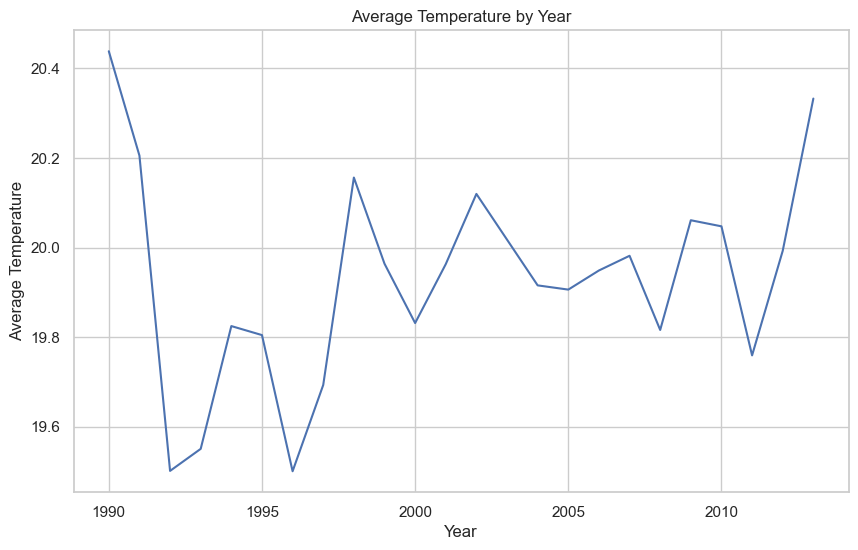

In [35]:
# Select only numeric columns before calculating the mean
numeric_columns = maize_data.select_dtypes(include=['number']).columns

# Calculate the average values by Year for numeric columns only
yearly_data = maize_data.groupby('Year')[numeric_columns].mean()

# 'Year' is already part of the index, so no need for reset_index()
# Set up the style and layout for the plots
sns.set(style="whitegrid")

# Example plot using yearly data (e.g., average temperature over the years)
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data, x=yearly_data.index, y='avg_temp')
plt.title('Average Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.show()
